In [ ]:
!pip install simpletransformers==0.63.4

In [ ]:
from simpletransformers.t5 import T5Model, T5Args
from torch import cuda

In [ ]:
model = T5Model("t5", "thanathorn/mt5-cpe-kmutt-thai-sentence-sum", use_cuda=cuda.is_available())

You are using a model of type mt5 to instantiate a model of type t5. This is not supported for all configurations of models and can yield errors.


In [ ]:
!pip install -U pythainlp pythainlp[full]

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/shopping.csv', sep='\t', names=['text', 'sentiment'], header=None)
df

,text,sentiment
0,text,sentiment
1,เกลียด ชอบหลอกให้สั่งซื้อ ที่ไหนได้ไม่มีสิ้นค้า,neg
2,สินค้าด้อยคุณภาพ,neg
3,สินค้าหมดทำไมไม่แจ้งขึ้นว่าหมดอะ.กดใส่ตะกร้าไป...,neg
4,อย่าทำแบบนี้กับใครอีกนะค่ะแย่มากค่ะ,neg
...,...,...
124,สินค้ามีตำหนิ แย่มากๆ ไม่ไหวๆเลย ถ้ามีตำหนิก็บ...,neg
125,เปราะบางมากความแข็งแรงน้อย มันง่ายต่อการแตกหัก,neg
126,ขนส่งก็ช้าสินค้ามีตำหนิแพ็คสินค้าไม่ดีมีรอยบุบ,neg
127,สินค้าเหมือนของปลอม เนื่อครีมเหมือนซอง 10 บาท ...,neg


<Axes: >

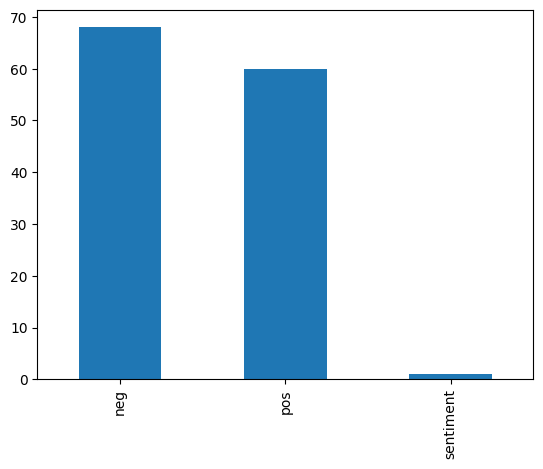

In [ ]:
df['sentiment'].value_counts().plot.bar()

In [ ]:
from pythainlp.corpus.common import thai_stopwords
thai_stopwords = list(thai_stopwords())
thai_stopwords

['ไม่ค่อย',
 'ฉัน',
 'เชื่อ',
 'น่า',
 'เต็มๆ',
 'เหล่า',
 'บางครา',
 'ขึ้น',
 'สูงส่ง',
 'ทั้งปวง',
 'เป็นเพราะ',
 'ที่ๆ',
 'กว่า',
 'ตามด้วย',
 'เช่นดังที่',
 'ด้วยเหตุเพราะ',
 'สมัยก่อน',
 'เยอะแยะ',
 'ก็ต่อเมื่อ',
 'ทํา',
 'มั้ยเนี่ย',
 'ยกให้',
 'ผู้ใด',
 'จัดแจง',
 'พวกกัน',
 'สุดๆ',
 'ตลอดวัน',
 'ตามที่',
 'มิ',
 'บ่อยๆ',
 'คง',
 'นิด',
 'เมื่อเย็น',
 'ใหญ่โต',
 'เปิด',
 'ทุกทาง',
 'บางคราว',
 'เราๆ',
 'เมื่อนี้',
 'ยิ่งจน',
 'กล่าวคือ',
 'แล้ว',
 'โตๆ',
 'ประการ',
 'อย่างโน้น',
 'จะได้',
 'แบบ',
 'คงจะ',
 'นาง',
 'สืบเนื่อง',
 'คล้ายว่า',
 'เช่นนั้น',
 'เผื่อว่า',
 'เผื่อ',
 'ตนฯ',
 'เท่าที่',
 'จังๆ',
 'เลย',
 'พึ่ง',
 'ขวางๆ',
 'อย่างมาก',
 'เดียวกัน',
 'อย่างน้อย',
 'เมื่อคราวที่',
 'ด้วยประการฉะนี้',
 'ร่วมมือ',
 'ปรากฏ',
 'ได้ที่',
 'เหตุนี้',
 'ขอ',
 'นะ',
 'นำมา',
 'แห่งใด',
 'มั้ยล่ะ',
 'เกี่ยวกัน',
 'เกี่ยวๆ',
 'แรก',
 'อีก',
 'รือ',
 'ได้',
 'เยอะ',
 'กำลัง',
 'กำหนด',
 'เข้า',
 'คราวๆ',
 'หนึ่ง',
 'อื่นๆ',
 'เห็นว่า',
 'ขณะใด',
 'อย่างนั้น',
 'ค่อยไปทาง',
 'เรียก',
 

In [ ]:
from pythainlp import word_tokenize
def text_process(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":", "!", '"', "ๆ", "ฯ"))
    final = word_tokenize(final)
    final = " ".join(word for word in final)
    final = " ".join(word for word in final.split()
                     if word.lower not in thai_stopwords)
    return final
df['text_tokens'] = df['text'].apply(text_process)
df

,text,sentiment,text_tokens
0,text,sentiment,text
1,เกลียด ชอบหลอกให้สั่งซื้อ ที่ไหนได้ไม่มีสิ้นค้า,neg,เกลียด ชอบ หลอก ให้ สั่งซื้อ ที่ไหนได้ ไม่ มี ...
2,สินค้าด้อยคุณภาพ,neg,สินค้า ด้อย คุณภาพ
3,สินค้าหมดทำไมไม่แจ้งขึ้นว่าหมดอะ.กดใส่ตะกร้าไป...,neg,สินค้า หมด ทำไม ไม่ แจ้ง ขึ้น ว่า หมด อะ กด ใส...
4,อย่าทำแบบนี้กับใครอีกนะค่ะแย่มากค่ะ,neg,อย่า ทำ แบบนี้ กับ ใคร อีก นะ ค่ะ แย่มาก ค่ะ
...,...,...,...
124,สินค้ามีตำหนิ แย่มากๆ ไม่ไหวๆเลย ถ้ามีตำหนิก็บ...,neg,สินค้า มีตำหนิ แย่มาก ไม่ ไหว เลย ถ้า มีตำหนิ ...
125,เปราะบางมากความแข็งแรงน้อย มันง่ายต่อการแตกหัก,neg,เปราะบาง มาก ความแข็งแรง น้อย มัน ง่าย ต่อ การ...
126,ขนส่งก็ช้าสินค้ามีตำหนิแพ็คสินค้าไม่ดีมีรอยบุบ,neg,ขนส่ง ก็ ช้า สินค้า มีตำหนิ แพ็ค สินค้า ไม่ ดี...
127,สินค้าเหมือนของปลอม เนื่อครีมเหมือนซอง 10 บาท ...,neg,สินค้า เหมือน ของปลอม เนื่อ ครีม เหมือน ซอง 10...


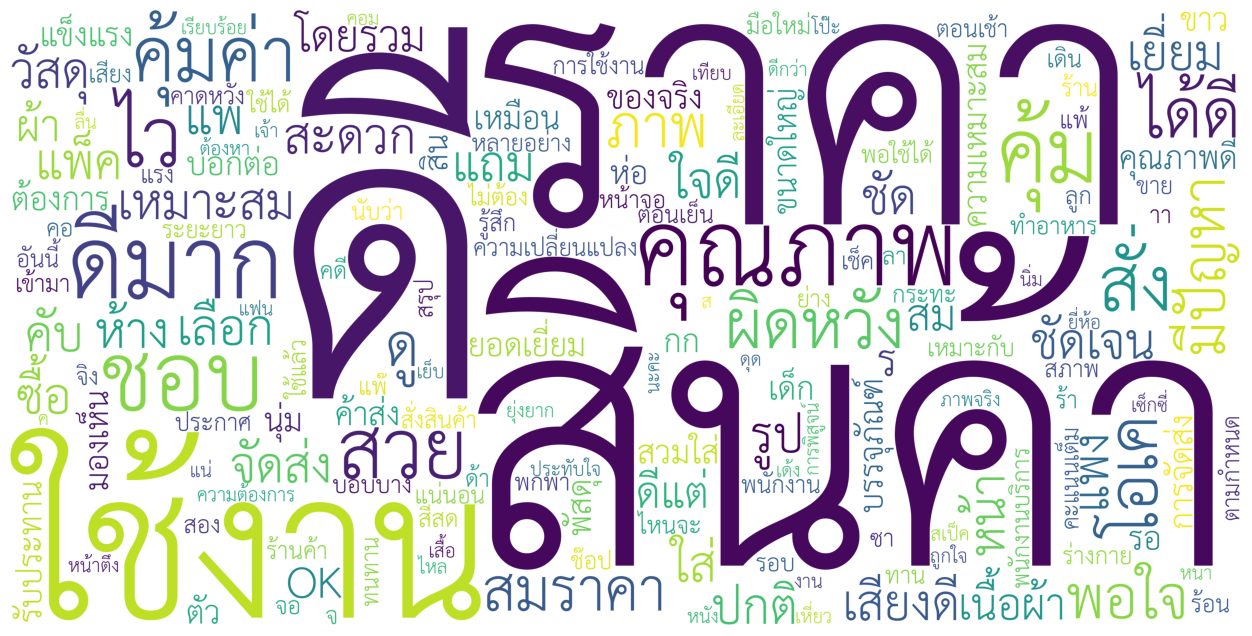

In [ ]:
from wordcloud import WordCloud, STOPWORDS
df_pos = df[df['sentiment'] == 'pos']
pos_word_all = " ".join(text for text in df_pos['text_tokens'])
reg = r"[ก-๙a-zA-Z']+"
fp = 'THSarabunNew.ttf'
wordcloud = WordCloud(stopwords=thai_stopwords, background_color = 'white', max_words=2000, height = 2000, width=4000, font_path='/content/THSarabunNew.ttf', regexp=reg).generate(pos_word_all)
plt.figure(figsize = (16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

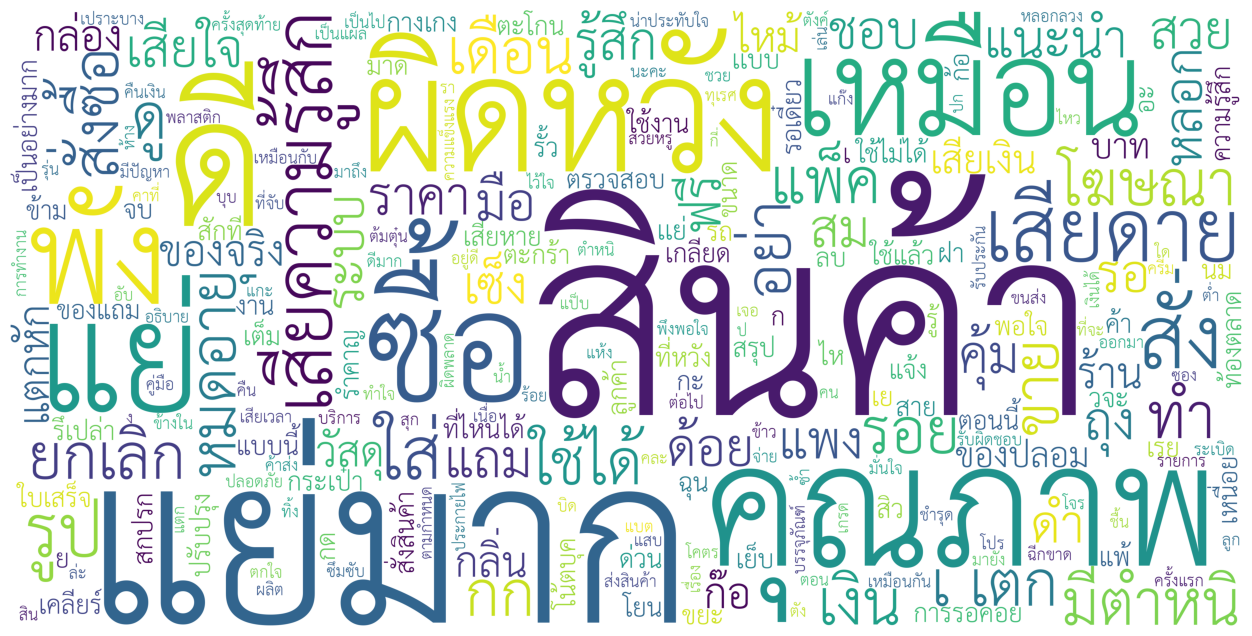

In [ ]:
df_neg = df[df['sentiment'] == 'neg']
neg_word_all = " ".join(text for text in df_neg['text_tokens'])
wordcloud = WordCloud(stopwords=thai_stopwords, background_color = 'white', max_words=2000, height = 2000, width=4000, font_path='/content/THSarabunNew.ttf', regexp=reg).generate(neg_word_all)
plt.figure(figsize = (16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X = df[['text_tokens']]
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(analyzer=lambda x:x.split(' '))
cvec.fit_transform(X_train['text_tokens'])
cvec.vocabulary_

{'ซื้อ': 91,
 'แล้ว': 364,
 'ผิดหวัง': 171,
 'สินค้า': 258,
 'ไม่': 393,
 'มี': 193,
 'คุณภาพ': 58,
 'หมด': 267,
 'ทำไม': 135,
 'แจ้ง': 345,
 'ขึ้น': 33,
 'ว่า': 239,
 'อะ': 279,
 'กด': 4,
 'ใส่': 384,
 'ตะกร้า': 111,
 'ไป': 392,
 'เถอะ': 301,
 'เซ็ง': 296,
 'เรย': 314,
 'ชอบ': 81,
 'ที่': 137,
 'ส่ง': 263,
 'เร็ว': 318,
 'มาก': 189,
 'ครับ': 37,
 'ทัน': 129,
 'ใจดี': 375,
 'จิง': 78,
 'สิน': 257,
 'ค้าส่ง': 65,
 'มา': 188,
 'แตกหัก': 347,
 'ยัง': 201,
 'ได้': 388,
 'ประกอบ': 164,
 'เลย': 319,
 'เสียความรู้สึก': 324,
 'แย่มาก': 362,
 'วัสดุ': 238,
 'เหมือน': 336,
 'หมดอายุ': 268,
 'รอย': 211,
 'ตำหนิ': 117,
 'เป็น': 306,
 'ง่าย': 68,
 'ของปลอม': 29,
 'เนื่อ': 304,
 'ครีม': 42,
 'ซอง': 87,
 '10': 0,
 'บาท': 160,
 'บรรจุภัณฑ์': 156,
 'ก๊อ': 22,
 'ป': 162,
 'ของจริง': 28,
 'ใน': 382,
 'ห้าง': 273,
 'เสียดาย': 327,
 'ตังค์': 113,
 'ทิ้ง': 136,
 'สมราคา': 244,
 'ค่ะ': 64,
 'ภาพ': 183,
 'ชัดเจน': 83,
 'เทียบ': 302,
 'กับ': 11,
 'ยี่ห้อ': 203,
 'อื่น': 284,
 'ราคา': 218,
 'ถูก': 125,
 'กว่า':

In [ ]:
train_bow = cvec.transform(X_train['text_tokens'])
pd.DataFrame(train_bow.toarray(), columns=cvec.get_feature_names_out(), index=X_train['text_tokens'])

,10,OK,text,กก,กด,กระทะ,กระเป๋า,กลิ่น,กล่อง,กว่า,...,ไม่,ไม่ค่อย,ไว,ไว้,ไห,ไหนจะ,ไหม้,ไหล,ไหว,☺
text_tokens,,,,,,,,,,,,,,,,,,,,,
ซื้อ แล้ว ผิดหวัง สินค้า ไม่ มี คุณภาพ,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
สินค้า หมด ทำไม ไม่ แจ้ง ขึ้น ว่า หมด อะ กด ใส่ ตะกร้า ไป เถอะ เซ็ง เรย,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
ชอบ ที่ ส่ง เร็ว มาก ครับ ทัน ใจดี จิง,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
สิน ค้าส่ง มา แตกหัก ยัง ไม่ ได้ ประกอบ เลย เสียความรู้สึก,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
สินค้า คุณภาพ แย่มาก วัสดุ เหมือน หมดอายุ แล้ว,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
แย่มาก รูป ดู สวยหรู ดี นะ แต่ มา เจอ ของจริง นี่ แย่ สุด สินค้า ไม่ สม กับ ราคา เลย,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
ตกใจ มาก โคตร แย่ ก่อนหน้านี้ ใช้ ดี ชอบ มาก ปลอดภัย ดี ตอน ระเบิด มี กลิ่น ไหม้ กับ ประกายไฟ ไม่ เป็นแผล แต่ เป็น ดำ ที่ มือ แสบ เล็กน้อย,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
ไม่ พึงพอใจ เลย สินค้า ผลิต จาก พลาสติก ด้อย คุณภาพ ก๊อ ง แก๊ง มาก,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bow, y_train)

LogisticRegression()

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
test_bow = cvec.transform(X_test['text_tokens'])
test_predictions = lr.predict(test_bow)
print(classification_report(test_predictions, y_test))

              precision    recall  f1-score   support

         neg       0.95      1.00      0.98        21
         pos       1.00      0.94      0.97        18

    accuracy                           0.97        39
   macro avg       0.98      0.97      0.97        39
weighted avg       0.98      0.97      0.97        39



In [ ]:
sentence = "แย่มากกกกกกค่ะ เอาของพังมาให้ฉุนมาดค่ะไม่พอใจเป็นอย่างมากค่ะ. ส่งของ ก็ไม่ได้ใบเสร็จ. ไม่ไหวจะเคลียร์"
prediction = model.predict([sentence])
print(prediction[0])

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:3982: FutureWarning: 
`prepare_seq2seq_batch` is deprecated and will be removed in version 5 of HuggingFace Transformers. Use the regular
`__call__` method to prepare your inputs and targets.

Here is a short example:

model_inputs = tokenizer(src_texts, text_target=tgt_texts, ...)

If you either need to use different keyword arguments for the source and target texts, you should do two calls like
this:

model_inputs = tokenizer(src_texts, ...)
labels = tokenizer(text_target=tgt_texts, ...)
model_inputs["labels"] = labels["input_ids"]

See the documentation of your specific tokenizer for more details on the specific arguments to the tokenizer of choice.
For a more complete example, see the implementation of `prepare_seq2seq_batch`.

  warnings.warn(formatted_warning, FutureWarning)
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:386: UserWarning: `do_sample` is set to `

Decoding outputs:   0%|          | 0/1 [00:00<?, ?it/s]

เอาของพังมาฉุนมาด


In [ ]:
my_text = prediction[0]
my_tokens = text_process(my_text)
my_bow = cvec.transform(pd.Series([my_tokens]))
my_predictions = lr.predict(my_bow)
my_predictions

array(['neg'], dtype=object)